In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re

### For Colab

In [2]:
# # This mounts your Google Drive to the Colab VM.
# from google.colab import drive
# drive.mount('/content/drive')

# # TODO: Enter the foldername in your Drive where you have saved the unzipped
# # assignment folder, e.g. 'cs231n/assignments/assignment1/'
# FOLDERNAME = 'PyTorch Test Project/N_TXT'
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# # Now that we've mounted your Drive, this ensures that
# # the Python interpreter of the Colab VM can load
# # python files from within it.
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# # This downloads the CIFAR-10 dataset to your Drive
# # if it doesn't already exist.
# # %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# # !bash get_datasets.sh
# # %cd /content/drive/My\ Drive/$FOLDERNAME

In [3]:
# path = "/content/drive/MyDrive/PyTorch Test Project/N_TXT"

# os.chdir(path)

# fx_data = np.array([], dtype=np.float32)

# #gets data from file specified by file_path
# def get_contents(file_path):
#     global fx_data
#     skip_lines = 7

#     with open(file_path,'r') as file:

#         for skips in range(skip_lines):
#             next(file)

#         lines = file.readlines()[:-1]

#         for line in lines:
#             data = line.split()[-1]
#             fx_data = np.append(fx_data, np.float32(data))
#             #print(data)

In [4]:
path = "C:\\Users\Admin\\.vscode\\PyTorch\\Time Series Prediction\\N_TXT"

os.chdir(path)

fx_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global fx_data
    skip_lines = 7

    with open(file_path,'r') as file:

        for skips in range(skip_lines):
            next(file)

        lines = file.readlines()[:-1]

        for line in lines:
            data = line.split()[-1]
            fx_data = np.append(fx_data, np.float32(data))
            #print(data)

In [5]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        

        print(f"Currently working on: {file_path}")
        get_contents(file_path)

fx_data.dtype

Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/10Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/11Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/1Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/2Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/3Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/4Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/5Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/6Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/7Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/8Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_

dtype('float32')

In [6]:
#create time "sample" for dataframe
time_data = np.array([], dtype=np.float32)

for x in range(len(fx_data)):
    time_data = np.append(time_data, np.float32(x))
    type(x)

time_data, time_data[0].dtype

(array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05], dtype=float32),
 dtype('float32'))

In [7]:
#create time "sample" for dataframe
dataset = pd.DataFrame({"Time": time_data,
                        "FX Channel": fx_data})
dataset, dataset.size

(            Time  FX Channel
 0            0.0        17.0
 1            1.0        17.0
 2            2.0        17.0
 3            3.0        17.0
 4            4.0        17.0
 ...          ...         ...
 187855  187855.0         1.3
 187856  187856.0         1.3
 187857  187857.0         1.3
 187858  187858.0         1.3
 187859  187859.0         1.3
 
 [187860 rows x 2 columns],
 375720)

([<matplotlib.lines.Line2D at 0x2d7c90d6150>], pandas.core.frame.DataFrame)

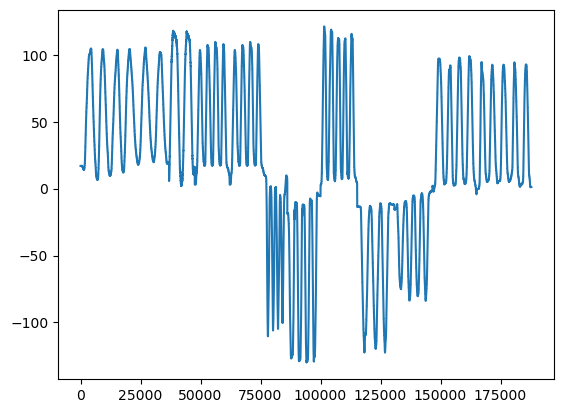

In [8]:
plt.plot(dataset["Time"], dataset["FX Channel"]), type(dataset)

In [9]:
X = dataset["Time"]
y = dataset["FX Channel"]

X

0              0.0
1              1.0
2              2.0
3              3.0
4              4.0
            ...   
187855    187855.0
187856    187856.0
187857    187857.0
187858    187858.0
187859    187859.0
Name: Time, Length: 187860, dtype: float32

In [10]:
#trying to split data loader now? not too sure if this is the best way
split_idx = int(0.8 * len(dataset))

temp_X_train = X[:split_idx]
temp_X_test = X[split_idx:]

temp_y_train = y[:split_idx]
temp_y_test = y[split_idx:]

temp_X_train.shape, temp_X_test.shape, temp_y_train.shape, temp_y_test.shape, len(X), temp_X_train

((150288,),
 (37572,),
 (150288,),
 (37572,),
 187860,
 0              0.0
 1              1.0
 2              2.0
 3              3.0
 4              4.0
             ...   
 150283    150283.0
 150284    150284.0
 150285    150285.0
 150286    150286.0
 150287    150287.0
 Name: Time, Length: 150288, dtype: float32)

In [11]:
def split_data(data, nsteps):
    data_list = list()

    for i in range(len(data)):
        end = i + nsteps
        if(end > len(data-1)):
            break

        extracted_data = data[i:end]

        data_list.append(extracted_data)

    return np.array(data_list)

In [12]:
len(temp_y_train), y[0:8]

(150288,
 0    17.0
 1    17.0
 2    17.0
 3    17.0
 4    17.0
 5    17.0
 6    17.0
 7    17.0
 Name: FX Channel, dtype: float32)

In [13]:
nsteps = 3
X_train = split_data(temp_X_train, nsteps)
X_test = split_data(temp_X_test, nsteps)
y_train = split_data(temp_y_train, nsteps)
y_test = split_data(temp_y_test, nsteps)

X_train, type(X_train), len(X_train)

(array([[0.00000e+00, 1.00000e+00, 2.00000e+00],
        [1.00000e+00, 2.00000e+00, 3.00000e+00],
        [2.00000e+00, 3.00000e+00, 4.00000e+00],
        ...,
        [1.50283e+05, 1.50284e+05, 1.50285e+05],
        [1.50284e+05, 1.50285e+05, 1.50286e+05],
        [1.50285e+05, 1.50286e+05, 1.50287e+05]], dtype=float32),
 numpy.ndarray,
 150286)

In [14]:
y_train, len(y_train)

(array([[17. , 17. , 17. ],
        [17. , 17. , 17. ],
        [17. , 17. , 17. ],
        ...,
        [76.9, 76.8, 76.7],
        [76.8, 76.7, 76.7],
        [76.7, 76.7, 76.6]], dtype=float32),
 150286)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

X_train.shape, y_train.shape, X_train.max(), X_train.min()

((150286, 3), (150286, 3), 1.0, 0.0)

In [16]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150286, 3]),
 torch.Size([37570, 3]),
 torch.Size([150286, 3]),
 torch.Size([37570, 3]))

In [17]:
type(X_train)

torch.Tensor

In [18]:
# X_train = X_train.unsqueeze(dim = 2)
# X_test = X_test.unsqueeze(dim = 2)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [19]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150286, 3]),
 torch.Size([37570, 3]),
 torch.Size([150286, 3]),
 torch.Size([37570, 3]))

In [21]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self,feature,target):
        self.feature = feature
        self.target = target
    
    def __len__(self):
        return len(self.feature)
    
    def __getitem__(self,idx):
        item = self.feature[idx]
        label = self.target[idx]
        
        return item,label

train_dataset = TimeSeriesDataset(X_train.reshape(X_train.shape[0],X_train.shape[1],1),y_train)
test_dataset = TimeSeriesDataset(X_test.reshape(X_test.shape[0],X_test.shape[1],1),y_test)

In [22]:
type(train_dataset)

__main__.TimeSeriesDataset

In [23]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 64

#turn datasets into iterables (batches)
train_loader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True,
                              drop_last=True)

test_loader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False, 
                              drop_last=True)

#check out what we've created
print(f"Dataloaders: {train_loader, test_loader}")
print(f"Length of train_dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of train_dataloader: {len(test_loader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002D7C8F43D50>, <torch.utils.data.dataloader.DataLoader object at 0x000002D7CA308750>)
Length of train_dataloader: 2348 batches of 64
Length of train_dataloader: 587 batches of 64


In [24]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([64, 3, 1]) torch.Size([64, 3])


In [25]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
device

'cuda'

In [26]:
class CNN_ForecastNet(nn.Module):
    def __init__(self):
        super(CNN_ForecastNet,self).__init__()
        self.conv1d = nn.Conv1d(3,64,kernel_size=1)
        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(64,50)
        self.fc2 = nn.Linear(50,1)
        
    def forward(self,x):
        x = self.conv1d(x)
        x = self.relu(x)
        # print(x.shape)
        #x = x.view(-1)  
        # print(x.shape)
        x = x.squeeze()
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x

In [27]:
model = CNN_ForecastNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

print(model)

CNN_ForecastNet(
  (conv1d): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
  (relu): ReLU(inplace=True)
  (fc1): Linear(in_features=64, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)


In [28]:
device

'cuda'

In [29]:
train_losses = []
valid_losses = []
def Train():
    
    running_loss = .0
    
    model.train()
    
    for idx, (inputs,labels) in enumerate(train_loader):

        inputs = inputs.to(device)
        # print(f"shape: {inputs.shape}")
        labels = labels.to(device)
        # print(inputs)
        optimizer.zero_grad()
        preds = model(inputs.float())
        loss = criterion(preds,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
        
    train_loss = running_loss/len(train_loader)
    train_losses.append(train_loss.detach().cpu().numpy())
    
    print(f'train_loss {train_loss}')
    
def Valid():
    running_loss = .0
    
    model.eval()
    
    with torch.inference_mode():
        for idx, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            preds = model(inputs.float())
            loss = criterion(preds,labels)
            running_loss += loss
            
        valid_loss = running_loss/len(test_loader)
        valid_losses.append(valid_loss.detach().cpu().numpy())
        print(f'valid_loss {valid_loss}')

In [30]:
import gc

epochs = 200
for epoch in range(epochs):
    print('epochs {}/{}'.format(epoch+1,epochs))
    Train()
    Valid()
    gc.collect()

epochs 1/200


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([64, 3])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


train_loss 0.03775506094098091
valid_loss 0.20127463340759277
epochs 2/200
train_loss 0.027238931506872177
valid_loss 0.17467907071113586
epochs 3/200
train_loss 0.025796229019761086
valid_loss 0.16786877810955048
epochs 4/200
train_loss 0.0251102726906538
valid_loss 0.17753095924854279
epochs 5/200
train_loss 0.0246219951659441
valid_loss 0.18454806506633759
epochs 6/200
train_loss 0.024019047617912292
valid_loss 0.18789167702198029
epochs 7/200
train_loss 0.023792486637830734
valid_loss 0.16549445688724518
epochs 8/200
train_loss 0.023660369217395782
valid_loss 0.1723804622888565
epochs 9/200
train_loss 0.023511407896876335
valid_loss 0.16977308690547943
epochs 10/200
train_loss 0.023401577025651932
valid_loss 0.16193677484989166
epochs 11/200
train_loss 0.023272333666682243
valid_loss 0.16601189970970154
epochs 12/200
train_loss 0.023184573277831078
valid_loss 0.18304377794265747
epochs 13/200
train_loss 0.023061221465468407
valid_loss 0.19494397938251495
epochs 14/200
train_loss 0.

In [31]:
X_train.shape, type(X_train)

(torch.Size([150286, 3]), torch.Tensor)

In [32]:
# plt.plot(train_acc, label='Train Acc')
# plt.plot(test_acc, label='Test Acc')
# plt.xlabel('Time')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [33]:
target_x = split_data(X, nsteps)
target_y = split_data(y, nsteps)

In [34]:
len(target_x)

187858

In [35]:
type(target_x)

numpy.ndarray

In [36]:
inputs = torch.from_numpy(target_x.transpose(0, 1))
torch.reshape(inputs, (len(target_x), 3, 1))

tensor([[[0.0000e+00],
         [1.0000e+00],
         [2.0000e+00]],

        [[1.0000e+00],
         [2.0000e+00],
         [3.0000e+00]],

        [[2.0000e+00],
         [3.0000e+00],
         [4.0000e+00]],

        ...,

        [[1.8786e+05],
         [1.8786e+05],
         [1.8786e+05]],

        [[1.8786e+05],
         [1.8786e+05],
         [1.8786e+05]],

        [[1.8786e+05],
         [1.8786e+05],
         [1.8786e+05]]])

In [37]:
len(inputs), len(target_x), (target_x.shape), inputs.shape[0]

(187858, 187858, (187858, 3), 187858)

In [38]:
model.eval()
prediction = []
batch_size = 1
iterations =  int(inputs.shape[0]/1)
print(iterations)


187858


In [39]:
print(iterations-batch_size)

187857


In [40]:
for i in range(iterations-batch_size):
    preds = model(torch.tensor(inputs[i:i + batch_size].transpose(0, 1)).to(device).float())
    # print(preds.squeeze().shape)
    # prediction.append(preds.detach().squeeze().cpu().numpy())
    prediction.append(preds.cpu().squeeze().detach().numpy())
    # break

print(prediction[0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_36796\910878085.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds = model(torch.tensor(inputs[i:i + batch_size].transpose(0, 1)).to(device).float())


0.78977394


ValueError: x and y must have same first dimension, but have shapes (187860,) and (187857,)

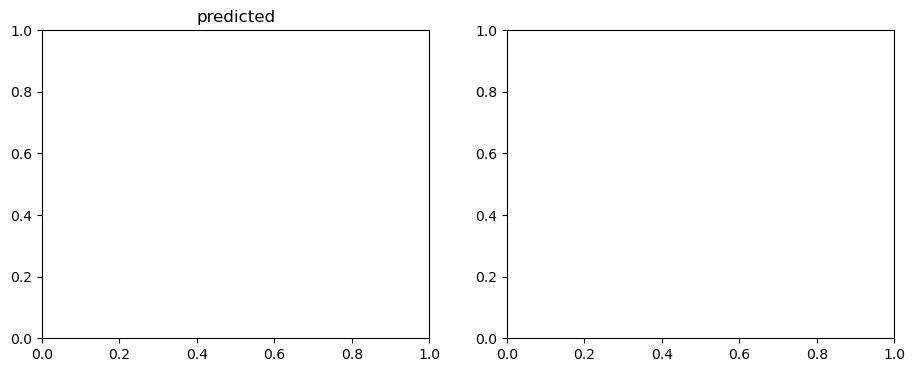

In [41]:
fig, ax = plt.subplots(1, 2,figsize=(11,4))
ax[0].set_title('predicted')
ax[0].plot(X,prediction)
ax[1].set_title('true')
ax[1].plot(target_y)
plt.show()

In [ ]:
X_test.transpose(dim0=1, dim1=-1).shape

torch.Size([37570, 3])

In [ ]:
prediction = []
model.eval()
with torch.inference_mode():
    for idx, (inputs, labels) in enumerate(test_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                preds = model(inputs.float())
                prediction.append(preds.detach().cpu().numpy())               

In [ ]:
type(prediction), prediction[1][2], len(test_loader)

(list, 0.5899346, 587)

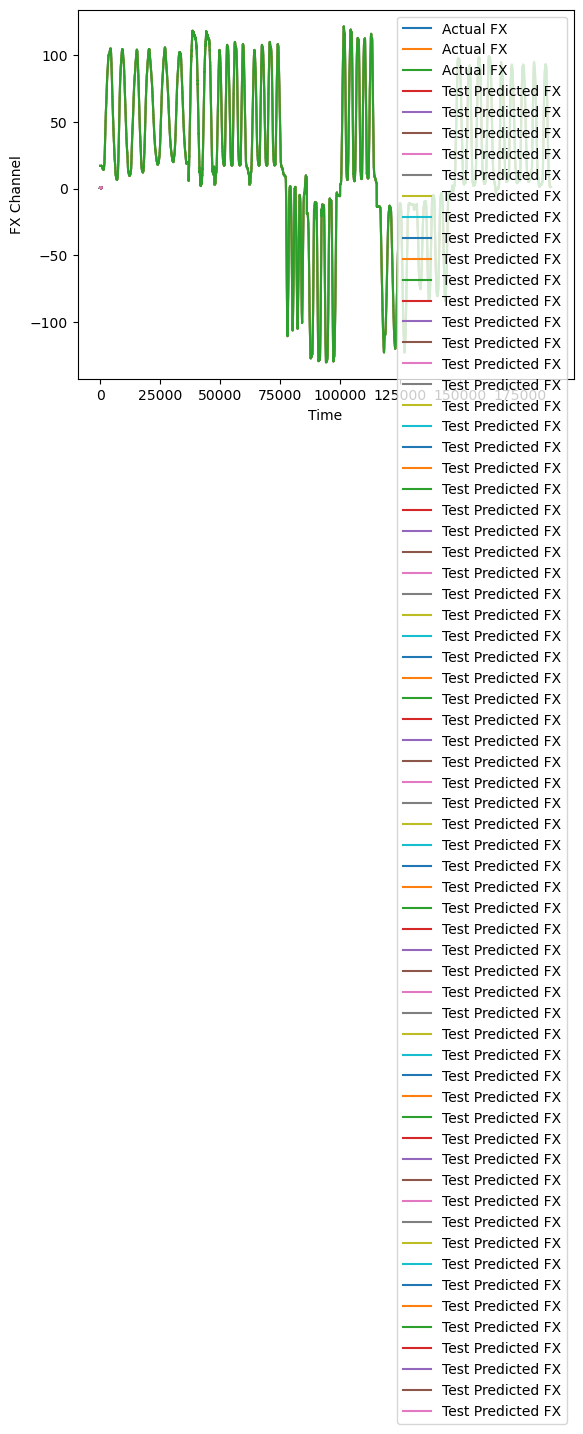

In [ ]:
plt.plot(target_y, label='Actual FX')
plt.plot(prediction, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test.transpose(dim0=0, dim1=-1).to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred.squeeze(), label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x37570 and 64x50)

In [ ]:
test_pred.squeeze().shape

(5807, 64)

In [ ]:
X_test.shape, X_test[0]

(torch.Size([5807, 8, 1]),
 tensor([[23226.],
         [23227.],
         [23228.],
         [23229.],
         [23230.],
         [23231.],
         [23232.],
         [23233.]]))

In [ ]:
temp = torch.arange(0, 1, 0.000016)
temp = temp.unsqueeze(dim=1)
temp.shape

torch.Size([62500, 1])

In [ ]:
model.eval()
with torch.inference_mode():
    test_pred = model(temp.unsqueeze(dim=1)).to('cpu').numpy()

# plt.xlim(0, (10000))
# plt.ylim(-0, 1)
# plt.autoscale(False)
plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

RuntimeError: Input and hidden tensors are not at the same device, found input tensor at cpu and hidden tensor at mps:0

ValueError: x and y can be no greater than 2D, but have shapes (5807,) and (5807, 64, 1)

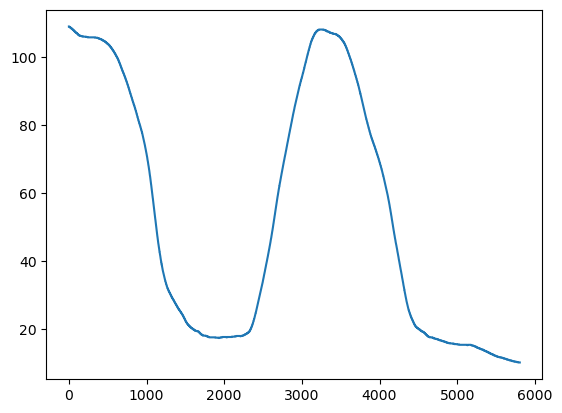

In [ ]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

In [ ]:
y_test[0], y_test[5800], y_train[0], y_train[23000]

(tensor([0.9934]), tensor([0.0665]), tensor([0.]), tensor([0.9775]))

In [ ]:
X_test.max(), X_test.min()

(tensor(1.0000), tensor(0.8000))